In [35]:
import nltk
from nltk import sent_tokenize, word_tokenize
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from nltk.corpus import stopwords, wordnet
from wordcloud import WordCloud, STOPWORDS ## To create word clouds from script

In [36]:
#input the script dataset
df = pd.read_csv("Game_of_Thrones_Script.csv", encoding = 'utf-8', header = 0)

In [37]:
df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 6 columns):
Release Date     23911 non-null object
Season           23911 non-null object
Episode          23911 non-null object
Episode Title    23911 non-null object
Name             23908 non-null object
Sentence         23911 non-null object
dtypes: object(6)
memory usage: 1.1+ MB


In [39]:
#check the missing value
for col in df.columns:
    print(col, df[col].isnull().sum())

Release Date 0
Season 0
Episode 0
Episode Title 0
Name 3
Sentence 0


In [40]:
#drop the na values
df = df.dropna()

In [41]:
#varify the data without missing values
for col in df.columns:
    print(col, df[col].isnull().sum())

Release Date 0
Season 0
Episode 0
Episode Title 0
Name 0
Sentence 0


In [42]:
rws = df.loc[:, ['Season','Name', 'Sentence']]

In [43]:
rws.head()

,Season,Name,Sentence
0,Season 1,waymar royce,What do you expect? They're savages. One lot s...
1,Season 1,will,I've never seen wildlings do a thing like this...
2,Season 1,waymar royce,How close did you get?
3,Season 1,will,Close as any man would.
4,Season 1,gared,We should head back to the wall.


In [44]:
#tokenize the sentence into tokens
rws['tokenized'] = rws['Sentence'].apply(word_tokenize)
rws.head()

,Season,Name,Sentence,tokenized
0,Season 1,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, 're, savages,..."
1,Season 1,will,I've never seen wildlings do a thing like this...,"[I, 've, never, seen, wildlings, do, a, thing,..."
2,Season 1,waymar royce,How close did you get?,"[How, close, did, you, get, ?]"
3,Season 1,will,Close as any man would.,"[Close, as, any, man, would, .]"
4,Season 1,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]"


In [45]:
#Normalized the tokens into lowercase and removed the puntuations and stop words
rws['lower_no_stopword'] = rws['tokenized'].apply(lambda x: [word.lower() for word in x if word.isalpha() and word.lower() not in stopwords.words('english')])
rws.head()

,Season,Name,Sentence,tokenized,lower_no_stopword,lower
0,Season 1,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, 're, savages,...","[expect, savages, one, lot, steals, goat, anot...","[what, do, you, expect, they, savages, one, lo..."
1,Season 1,will,I've never seen wildlings do a thing like this...,"[I, 've, never, seen, wildlings, do, a, thing,...","[never, seen, wildlings, thing, like, never, s...","[i, never, seen, wildlings, do, a, thing, like..."
2,Season 1,waymar royce,How close did you get?,"[How, close, did, you, get, ?]","[close, get]","[how, close, did, you, get]"
3,Season 1,will,Close as any man would.,"[Close, as, any, man, would, .]","[close, man, would]","[close, as, any, man, would]"
4,Season 1,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]","[head, back, wall]","[we, should, head, back, to, the, wall]"


In [46]:
#Use Stemmers to remove the same verb in different tense or same noun in different numbers
porter = nltk.PorterStemmer()
rws['porter'] = rws['lower_no_stopword'].apply(lambda x: [porter.stem(word) for word in x])
rws.head(10)

,Season,Name,Sentence,tokenized,lower_no_stopword,lower,porter
0,Season 1,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, 're, savages,...","[expect, savages, one, lot, steals, goat, anot...","[what, do, you, expect, they, savages, one, lo...","[expect, savag, one, lot, steal, goat, anoth, ..."
1,Season 1,will,I've never seen wildlings do a thing like this...,"[I, 've, never, seen, wildlings, do, a, thing,...","[never, seen, wildlings, thing, like, never, s...","[i, never, seen, wildlings, do, a, thing, like...","[never, seen, wildl, thing, like, never, seen,..."
2,Season 1,waymar royce,How close did you get?,"[How, close, did, you, get, ?]","[close, get]","[how, close, did, you, get]","[close, get]"
3,Season 1,will,Close as any man would.,"[Close, as, any, man, would, .]","[close, man, would]","[close, as, any, man, would]","[close, man, would]"
4,Season 1,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]","[head, back, wall]","[we, should, head, back, to, the, wall]","[head, back, wall]"
5,Season 1,royce,Do the dead frighten you?,"[Do, the, dead, frighten, you, ?]","[dead, frighten]","[do, the, dead, frighten, you]","[dead, frighten]"
6,Season 1,gared,Our orders were to track the wildlings. We tra...,"[Our, orders, were, to, track, the, wildlings,...","[orders, track, wildlings, tracked, wo, troubl...","[our, orders, were, to, track, the, wildlings,...","[order, track, wildl, track, wo, troubl, us]"
7,Season 1,royce,You don't think he'll ask us how they died? Ge...,"[You, do, n't, think, he, 'll, ask, us, how, t...","[think, ask, us, died, get, back, horse]","[you, do, think, he, ask, us, how, they, died,...","[think, ask, us, die, get, back, hors]"
8,Season 1,will,Whatever did it to them could do it to us. The...,"[Whatever, did, it, to, them, could, do, it, t...","[whatever, could, us, even, killed, children]","[whatever, did, it, to, them, could, do, it, t...","[whatev, could, us, even, kill, children]"
9,Season 1,royce,It's a good thing we're not children. You want...,"[It, 's, a, good, thing, we, 're, not, childre...","[good, thing, children, want, run, away, south...","[it, a, good, thing, we, not, children, you, w...","[good, thing, children, want, run, away, south..."


In [47]:
name_words = rws.loc[:, ['Name', 'porter']]
name_words.head()

,Name,porter
0,waymar royce,"[expect, savag, one, lot, steal, goat, anoth, ..."
1,will,"[never, seen, wildl, thing, like, never, seen,..."
2,waymar royce,"[close, get]"
3,will,"[close, man, would]"
4,gared,"[head, back, wall]"


In [48]:
#Pair name and words into a list
name_word_list = name_words.values.tolist()
print (name_word_list[:20])

[['waymar royce', ['expect', 'savag', 'one', 'lot', 'steal', 'goat', 'anoth', 'lot', 'know', 'rip', 'piec']], ['will', ['never', 'seen', 'wildl', 'thing', 'like', 'never', 'seen', 'thing', 'like', 'ever', 'life']], ['waymar royce', ['close', 'get']], ['will', ['close', 'man', 'would']], ['gared', ['head', 'back', 'wall']], ['royce', ['dead', 'frighten']], ['gared', ['order', 'track', 'wildl', 'track', 'wo', 'troubl', 'us']], ['royce', ['think', 'ask', 'us', 'die', 'get', 'back', 'hors']], ['will', ['whatev', 'could', 'us', 'even', 'kill', 'children']], ['royce', ['good', 'thing', 'children', 'want', 'run', 'away', 'south', 'run', 'away', 'cours', 'behead', 'desert', 'catch', 'first', 'get', 'back', 'hors', 'wo', 'say']], ['royce', ['dead', 'men', 'seem', 'move', 'camp']], ['will', []], ['gared', ['see', 'went']], ['royce', []], ['gared', []], ['jon snow', ['go', 'father', 'watch']], ['jon snow', ['mother']], ['septa mordane', ['fine', 'work', 'alway', 'well', 'done']], ['sansa stark', 

In [49]:
#Filter out the Cerisei's words
cersei_list = []
for item in name_word_list:
    if item[0] == 'cersei lannister':
        for j in item[1]:
            cersei_list.append(j)
print(cersei_list)

['never', 'worri', 'anyth', 'seven', 'jump', 'cliff', 'casterli', 'rock', 'one', 'hundr', 'foot', 'drop', 'water', 'never', 'afraid', 'jon', 'arryn', 'told', 'someon', 'husband', 'hand', 'king', 'ride', 'month', 'love', 'sure', 'dead', 'wait', 'brother', 'go', 'find', 'littl', 'beast', 'ye', 'love', 'countri', 'hello', 'littl', 'dove', 'beauti', 'old', 'tall', 'still', 'grow', 'bled', 'yet', 'dress', 'make', 'talent', 'must', 'make', 'someth', 'hear', 'might', 'share', 'grandchild', 'someday', 'daughter', 'well', 'capit', 'beauti', 'stay', 'hidden', 'forev', 'stop', 'stop', 'saw', 'us', 'saw', 'us', 'mean', 'merci', 'let', 'child', 'linger', 'pain', 'still', 'ca', 'believ', 'go', 'ridicul', 'even', 'children', 'need', 'hear', 'filth', 'come', 'pleas', 'home', 'guest', 'handsom', 'one', 'lost', 'first', 'boy', 'littl', 'beauti', 'fighter', 'tri', 'beat', 'fever', 'took', 'forgiv', 'last', 'thing', 'need', 'hear', 'right', 'year', 'ago', 'robert', 'craze', 'beat', 'hand', 'bloodi', 'wall

In [50]:
#Filter out the Daenery's words
daenerys_list = []
for item in name_word_list:
    if item[0] == 'daenerys targaryen':
        for j in item[1]:
            daenerys_list.append(j)
print(daenerys_list)

['guest', 'year', 'never', 'ask', 'us', 'anyth', 'want', 'queen', 'want', 'go', 'home', 'know', 'thank', 'ser', 'countri', 'thank', 'magist', 'beauti', 'ser', 'jorah', 'know', 'say', 'thank', 'dothraki', 'know', 'common', 'tongu', 'word', 'know', 'anyth', 'els', 'ever', 'seen', 'dragon', 'everywher', 'even', 'east', 'moon', 'leav', 'trader', 'garth', 'tell', 'stori', 'old', 'nine', 'teach', 'make', 'khal', 'happi', 'take', 'three', 'year', 'finish', 'man', 'well', 'sound', 'like', 'interest', 'woman', 'think', 'drogo', 'like', 'top', 'think', 'dothraki', 'way', 'tonight', 'would', 'look', 'upon', 'face', 'tell', 'stop', 'command', 'otherwis', 'queen', 'khaleesi', 'pleas', 'pleas', 'hurt', 'tell', 'want', 'brother', 'harm', 'boy', 'know', 'peopl', 'call', 'savag', 'brother', 'given', 'armi', 'dothraki', 'could', 'conquer', 'seven', 'kingdom', 'know', 'men', 'sold', 'slave', 'hush', 'right', 'irri', 'take', 'leav', 'us', 'hit', 'command', 'want', 'invit', 'supper', 'gift', 'made', 'pleas

In [51]:
len(cersei_list), len(daenerys_list)

(6513, 5416)

In [52]:
#Create Cersei word frequency dictionary
cersei_fd = nltk.FreqDist(cersei_list)

In [53]:
#by checking three types of verb "love", we make sure stemming work for our target words 
cersei_fd['love'], cersei_fd['loved'], cersei_fd['loves'], cersei_fd['loving']

(45, 0, 0, 0)

In [54]:
cersei_fd.freq("love")

0.006909258406264394

In [55]:
cersei_fd['kill'], cersei_fd['killed'], cersei_fd['kills'], cersei_fd['killing']

(29, 0, 0, 0)

In [56]:
cersei_fd.freq("kill")

0.004452633195148165

In [57]:
print(cersei_fd.most_common(50))

[('want', 72), ('one', 63), ('king', 63), ('father', 60), ('know', 59), ('would', 55), ('like', 50), ('us', 49), ('love', 45), ('good', 43), ('brother', 41), ('littl', 40), ('think', 39), ('son', 37), ('queen', 36), ('could', 35), ('make', 34), ('need', 34), ('come', 33), ('man', 33), ('go', 32), ('take', 32), ('see', 31), ('stark', 31), ('daughter', 30), ('ser', 30), ('back', 30), ('joffrey', 29), ('kill', 29), ('jaim', 29), ('let', 27), ('thing', 27), ('look', 27), ('time', 27), ('day', 26), ('never', 25), ('tell', 25), ('way', 25), ('ca', 24), ('right', 24), ('mother', 24), ('world', 24), ('lord', 24), ('say', 24), ('die', 24), ('told', 23), ('boy', 23), ('ever', 23), ('high', 23), ('hear', 22)]


In [58]:
#Find the most common words that Cersei spoke in cumulative order
cersei_most_common_words = [word for (word, count) in cersei_fd.most_common()]
cumulative = 0.0
for rank, word in enumerate(cersei_most_common_words):
        cumulative += cersei_fd.freq(word)
        print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
        if cumulative > 0.2: 
            break

  1   1.11% want
  2   2.07% one
  3   3.04% king
  4   3.96% father
  5   4.87% know
  6   5.71% would
  7   6.48% like
  8   7.23% us
  9   7.92% love
 10   8.58% good
 11   9.21% brother
 12   9.83% littl
 13  10.43% think
 14  10.99% son
 15  11.55% queen
 16  12.08% could
 17  12.61% make
 18  13.13% need
 19  13.63% come
 20  14.14% man
 21  14.63% go
 22  15.12% take
 23  15.60% see
 24  16.08% stark
 25  16.54% daughter
 26  17.00% ser
 27  17.46% back
 28  17.90% joffrey
 29  18.35% kill
 30  18.79% jaim
 31  19.21% let
 32  19.62% thing
 33  20.04% look


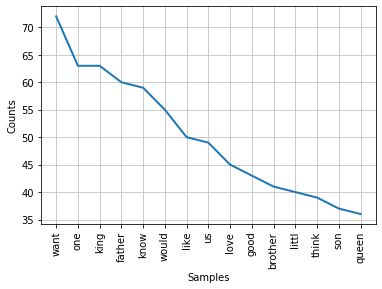

In [59]:
#Plot the 15 most frequent words from Cersei dictionary
cersei_fd.plot(15, cumulative=False)

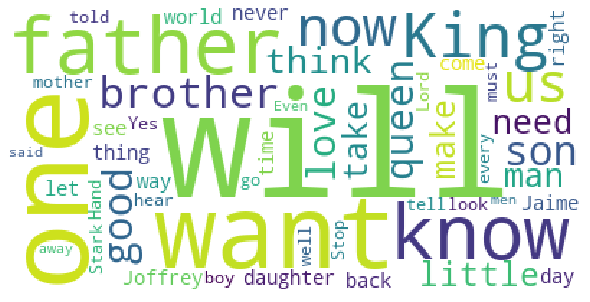

In [82]:
cersei_lannister = rws[rws['Name']=='cersei lannister']
wordcloud = WordCloud(stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(
    ' '.join(i for i in cersei_lannister['Sentence']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [61]:
#Create Daenerys word frequency dictionary
daenerys_fd = nltk.FreqDist(daenerys_list)

In [62]:
daenerys_fd['love'], daenerys_fd['loved'], daenerys_fd['loves'], daenerys_fd['loving']

(13, 0, 0, 0)

In [63]:
daenerys_fd.freq("love")

0.0024002954209748893

In [64]:
daenerys_fd['kill'], daenerys_fd['killed'], daenerys_fd['kills'], daenerys_fd['killing']

(34, 0, 0, 0)

In [65]:
daenerys_fd.freq("kill")

0.006277695716395864

In [66]:
print(daenerys_fd.most_common(50))

[('take', 54), ('know', 52), ('want', 49), ('one', 49), ('dragon', 46), ('men', 42), ('peopl', 40), ('would', 37), ('well', 34), ('like', 34), ('kill', 34), ('go', 33), ('man', 33), ('queen', 32), ('back', 32), ('tell', 31), ('need', 30), ('fight', 30), ('brother', 29), ('mani', 29), ('ca', 29), ('ser', 28), ('king', 28), ('jon', 26), ('name', 25), ('l', 25), ('khal', 24), ('think', 24), ('jorah', 23), ('look', 23), ('die', 23), ('citi', 23), ('master', 23), ('slave', 22), ('right', 22), ('world', 22), ('us', 21), ('dothraki', 21), ('could', 21), ('come', 21), ('enemi', 21), ('good', 21), ('walk', 21), ('meereen', 21), ('ever', 20), ('kingdom', 20), ('life', 20), ('see', 20), ('father', 20), ('say', 19)]


In [67]:
#Find the most common words that Daenerys spoke in cumulative order
daenerys_most_common_words = [word for (word, count) in daenerys_fd.most_common()]
cumulative = 0.0
for rank, word in enumerate(daenerys_most_common_words):
        cumulative += daenerys_fd.freq(word)
        print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
        if cumulative > 0.2: 
            break

  1   1.00% take
  2   1.96% know
  3   2.86% want
  4   3.77% one
  5   4.62% dragon
  6   5.39% men
  7   6.13% peopl
  8   6.81% would
  9   7.44% well
 10   8.07% like
 11   8.70% kill
 12   9.31% go
 13   9.92% man
 14  10.51% queen
 15  11.10% back
 16  11.67% tell
 17  12.22% need
 18  12.78% fight
 19  13.31% brother
 20  13.85% mani
 21  14.38% ca
 22  14.90% ser
 23  15.42% king
 24  15.90% jon
 25  16.36% name
 26  16.82% l
 27  17.26% khal
 28  17.71% think
 29  18.13% jorah
 30  18.56% look
 31  18.98% die
 32  19.41% citi
 33  19.83% master
 34  20.24% slave


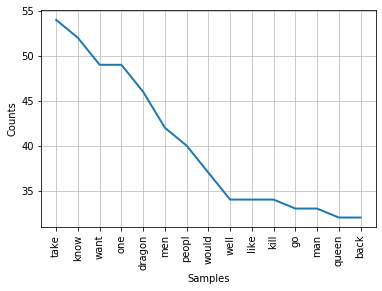

In [68]:
daenerys_fd.plot(15, cumulative=False)

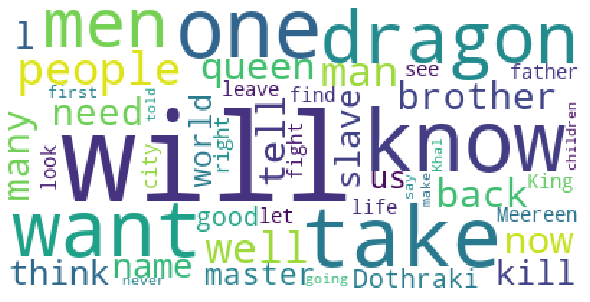

In [83]:
daenerys_targaryen = df[df['Name']=='daenerys targaryen']
wordcloud = WordCloud(stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(
    ' '.join(i for i in daenerys_targaryen['Sentence']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 